In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
sns.set_theme()
sns.set_style('whitegrid')

def get_raw_results(cur_dir, skip=0):
    with open(cur_dir, 'r') as file:
        elems = file.read().split('\n')[skip:-1]
        elems = [float(e) for e in elems]
        return elems

def results_generator(l, basedir, skip=0):
    for d in l:
        cur_dir = os.path.join(basedir, d)
        elems = get_raw_results(cur_dir, skip)
        m = sum(elems) / len(elems)
        yield m

In [2]:
numerical = [int(dir) for dir in os.listdir('results/mm/from_device')]
numerical.sort()
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/mm/from_device/'))
results2 = list(results_generator(l, 'results/mm/from_host/'))
results3 = list(results_generator(l, 'results/mm/untouched/'))
results4 = list(results_generator(l, 'results/mm/device_mem/'))
results5 = list(results_generator(l, 'results/mm/device_initialized_mem/'))

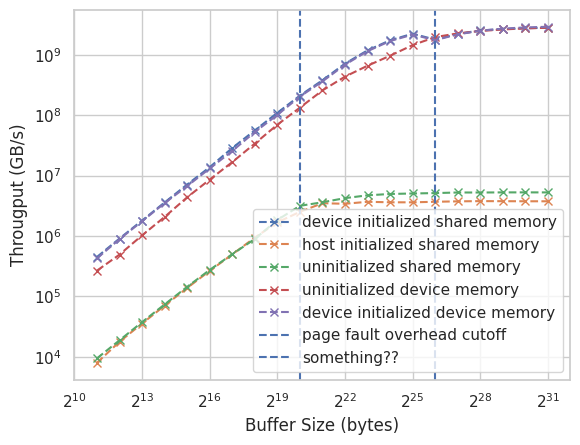

In [11]:
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='device initialized shared memory')
plt.plot(numerical, results2, '--x', label='host initialized shared memory')
plt.plot(numerical, results3, '--x', label='uninitialized shared memory')
plt.plot(numerical, results4, '--x', label='uninitialized device memory')
plt.plot(numerical, results5, '--x', label='device initialized device memory')
plt.axvline(x=2**20, ls='--', label = 'page fault overhead cutoff')
plt.axvline(x=2**26, ls='--', label = 'something??')
plt.legend()
plt.show()

In [12]:
numerical = [int(dir) for dir in os.listdir('results/cooperative')]
numerical.sort()
numerical = numerical[1:]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/cooperative/'))
results2 = list(results_generator(l, 'results/dynamic/'))
results3 = list(results_generator(l, 'results/host/'))
results4 = list(results_generator(l, 'results/flattened/'))

FileNotFoundError: [Errno 2] No such file or directory: 'results/host/64'

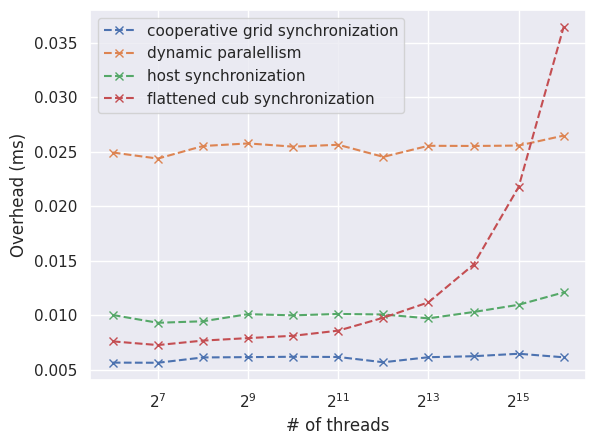

In [ ]:
plt.xscale('log', base=2)
plt.xlabel('# of threads')
plt.ylabel('Overhead (ms)')
plt.plot(numerical, results1, '--x', label='cooperative grid synchronization')
plt.plot(numerical, results2, '--x', label='dynamic paralellism')
plt.plot(numerical, results3, '--x', label='host synchronization')
plt.plot(numerical, results4, '--x', label='flattened cub synchronization')
plt.legend()
plt.show()

In [13]:
numerical = [int(dir) for dir in os.listdir('results/hmm/device_modified')]
numerical.sort()
# numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/hmm/device_modified/'))
results2 = list(results_generator(l, 'results/hmm/host_modified/'))
results3 = list(results_generator(l, 'results/hmm/host_invalidated/'))
results4 = list(results_generator(l, 'results/hmm/host_exclusive/'))
results5 = list(results_generator(l, 'results/hmm/untouched/'))
results6 = list(results_generator(l, 'results/hmm/device_mem/'))

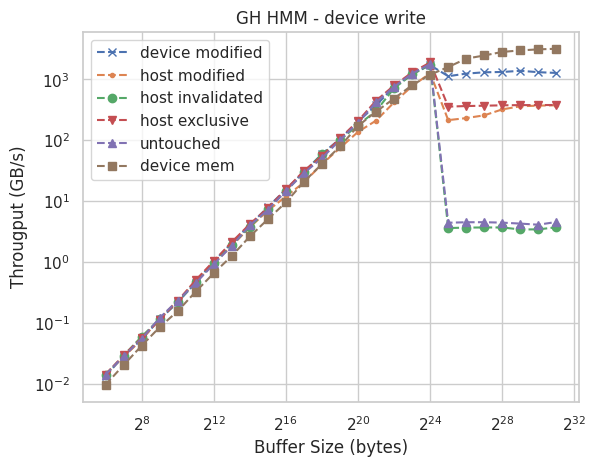

In [14]:
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title('GH HMM - device write')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='device modified')
plt.plot(numerical, results2, '--.', label='host modified')
plt.plot(numerical, results3, '--o', label='host invalidated')
plt.plot(numerical, results4, '--v', label='host exclusive')
plt.plot(numerical, results5, '--^', label='untouched')
plt.plot(numerical, results6, '--s', label='device mem')
plt.legend()
plt.show()


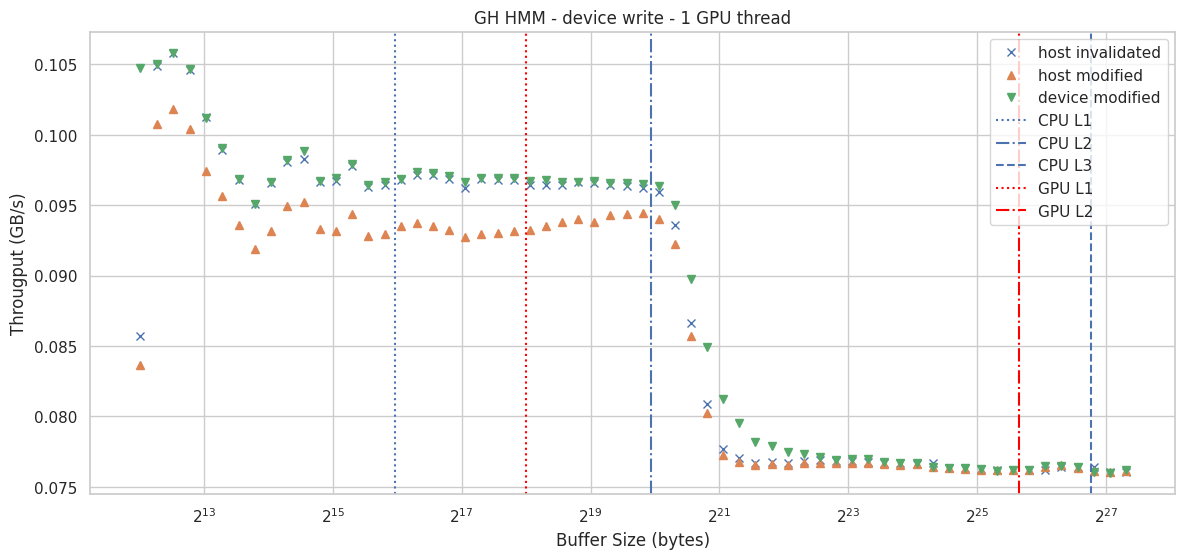

In [203]:
numerical = [int(dir) for dir in os.listdir('results/tiny/single/device_modified')]
numerical.sort()
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/single/untouched/'))
results2 = list(results_generator(l, 'results/tiny/single/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/single/device_modified/'))

plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU thread')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, 'x', label='host invalidated')
plt.plot(numerical, results2, '^', label='host modified')
plt.plot(numerical, results3, 'v', label='device modified')
plt.axvline(x=64000, ls=':', label = 'CPU L1')
plt.axvline(x=1000000, ls='-.', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.axvline(x=262144, ls=':', color='red', label = 'GPU L1')
plt.axvline(x=52428800, ls='-.', color='red', label = 'GPU L2')
plt.legend()
plt.show()

In [8]:
numerical = [int(dir) for dir in os.listdir('results/tiny/warp/untouched')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/warp/untouched/'))
results2 = list(results_generator(l, 'results/tiny/warp/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/warp/device_modified/'))

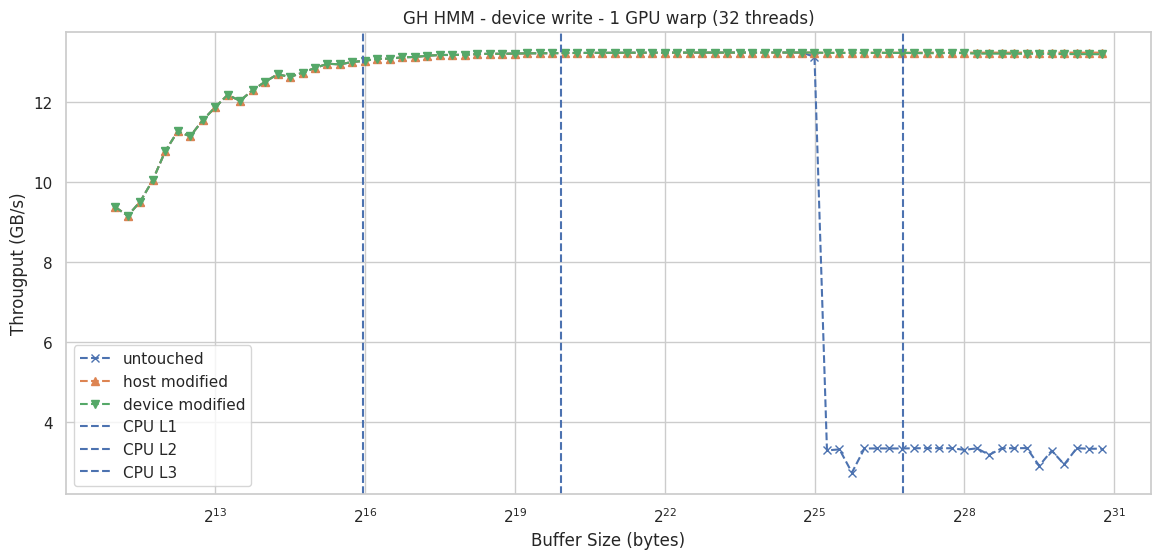

In [9]:
plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU warp (32 threads)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

In [205]:
numerical = [int(dir) for dir in os.listdir('results/tiny/block/untouched')]
numerical.sort()
#numerical = numerical[:6]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/block/untouched/'))
results2 = list(results_generator(l, 'results/tiny/block/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/block/device_modified/'))

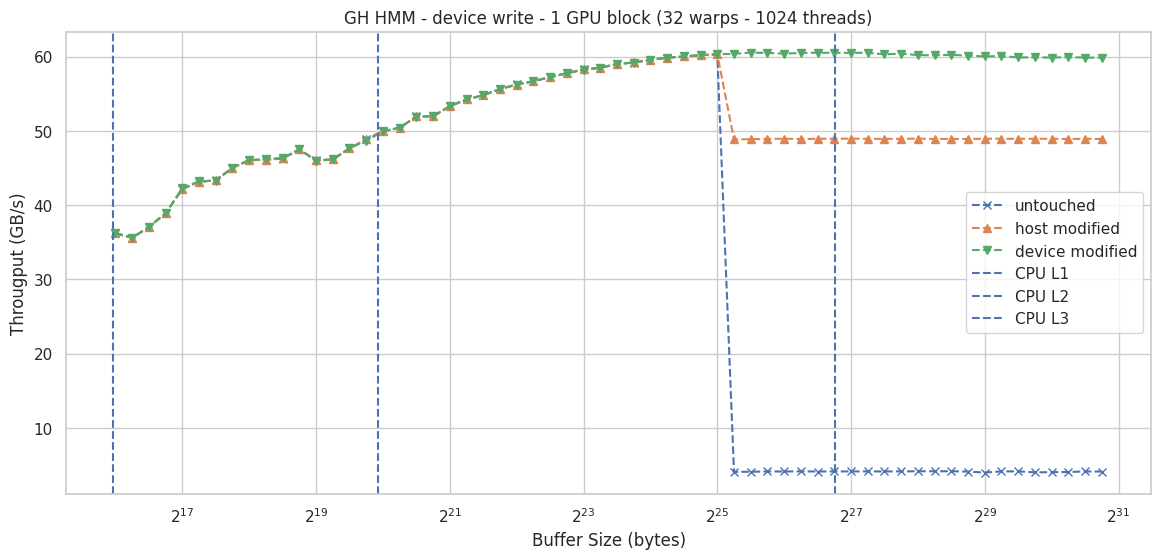

In [206]:
plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - 1 GPU block (32 warps - 1024 threads)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=64000, ls='--', label = 'CPU L1')
plt.axvline(x=1000000, ls='--', label = 'CPU L2')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

In [12]:
numerical = [int(dir) for dir in os.listdir('results/tiny/full/untouched')]
numerical.sort()
numerical = numerical[:-1]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/tiny/full/untouched/'))
results2 = list(results_generator(l, 'results/tiny/full/host_modified/'))
results3 = list(results_generator(l, 'results/tiny/full/device_modified/'))

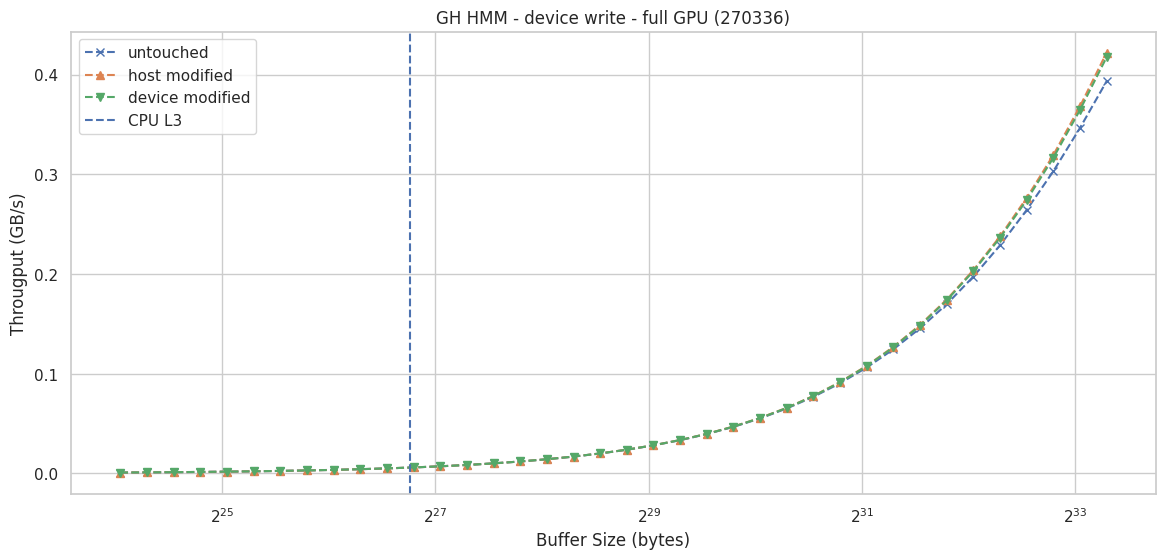

In [14]:
plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM - device write - full GPU (270336)')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, '--x', label='untouched')
plt.plot(numerical, results2, '--^', label='host modified')
plt.plot(numerical, results3, '--v', label='device modified')
plt.axvline(x=114000000, ls='--', label = 'CPU L3')
plt.legend()
plt.show()

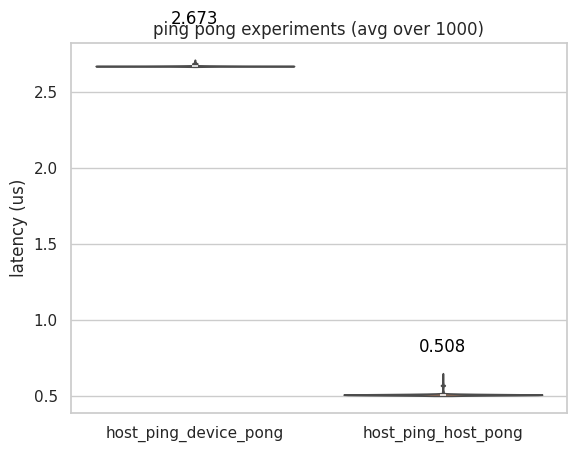

In [186]:
experiments = ['host_ping_device_pong', 'host_ping_host_pong']
data = {}

for e in experiments:
    with open('results/atomic/' + e, 'r') as file:
        elems = file.read().split('\n')[:-1]
        elems = [float(e) for e in elems]
        data[e] = elems

plt.title('ping pong experiments (avg over 1000)')
plt.ylabel('latency (us)')
ax = sns.violinplot(data)
for i, cur in enumerate(data):
    d = data[cur]
    avg = sum(d)/len(d)
    ax.text(i, avg + 0.25, '%.3f'%avg, ha='center', va='bottom', color='black')

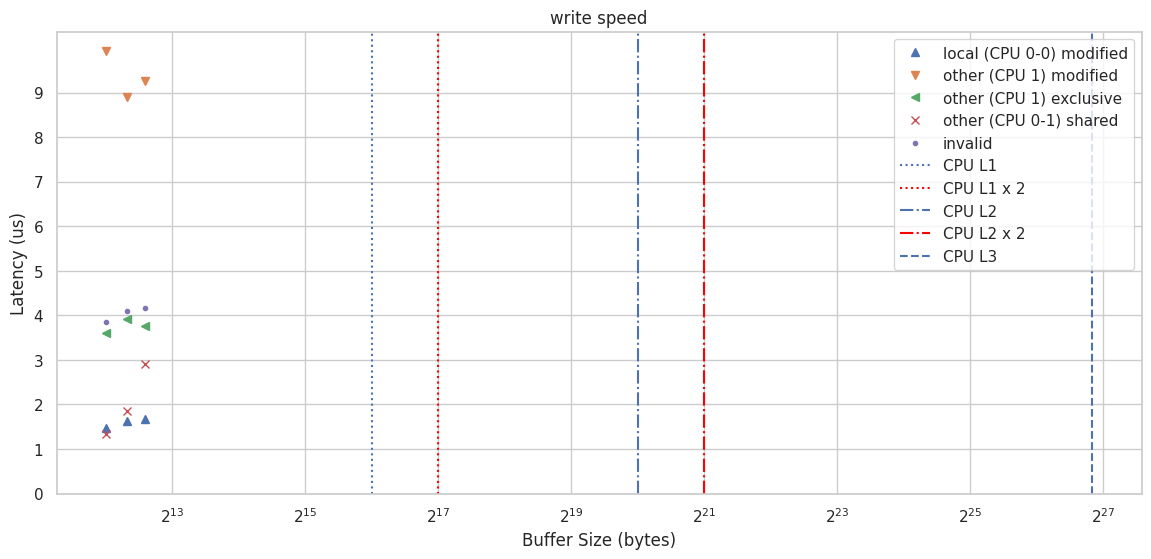

In [178]:
numerical = [int(dir) for dir in os.listdir('results/host/write/other_exclusive')]
numerical.sort()
#numerical = numerical[8:]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/host/write/local_modified/'))
results2 = list(results_generator(l, 'results/host/write/other_modified/'))
results3 = list(results_generator(l, 'results/host/write/invalid/'))
#results4 = list(results_generator(l, 'results/host/write/far_modified/'))
results5 = list(results_generator(l, 'results/host/write/other_shared/'))
#results6 = list(results_generator(l, 'results/host/write/far_shared/'))
results7 = list(results_generator(l, 'results/host/write/other_exclusive/'))

plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('write speed')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Latency (us)')
plt.plot(numerical, results1, '^', label='local (CPU 0-0) modified')
plt.plot(numerical, results2, 'v', label='other (CPU 1) modified')
plt.plot(numerical, results7, '<', label='other (CPU 1) exclusive')
#plt.plot(numerical, results4, '<', label='other (CPU 15) modified')
plt.plot(numerical, results5, 'x', label='other (CPU 0-1) shared')
#plt.plot(numerical, results6, '+', label='other (CPU 0-15) shared')
plt.plot(numerical, results3, '.', label='invalid')
plt.axvline(x=65536, ls=':', label = 'CPU L1')
plt.axvline(x=65536*2, ls=':', color='red', label = 'CPU L1 x 2')
plt.axvline(x=1048576, ls='-.', label = 'CPU L2')
plt.axvline(x=1048576*2, ls='-.', color='red', label = 'CPU L2 x 2')
plt.axvline(x=119537664, ls='--', label = 'CPU L3')
plt.legend()
plt.yticks(list(range(int(max(results2))+1)))
plt.show()

1
64 0
[ 0.   6.4 12.8 19.2 25.6 32.  38.4 44.8 51.2 57.6 64. ]
[1341    0    0    0    0 8538    0    0    0  121]


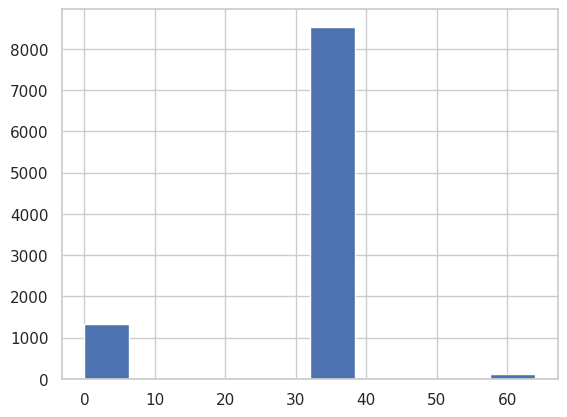

In [53]:
with open('results/clock_granularity', 'r') as file:
    elems = file.read().split('\n')[:-1]
    elems = [int(e) for e in elems]

print(cnt)
print(max(elems), min(elems))
counts, bins = np.histogram(elems)
plt.hist(bins[:-1], bins, weights=counts)
#plt.xticks([0, 32, 64])
print(bins)
print(counts)

7.0 7.0
[6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5]
[    0     0     0     0     0 10000     0     0     0     0]


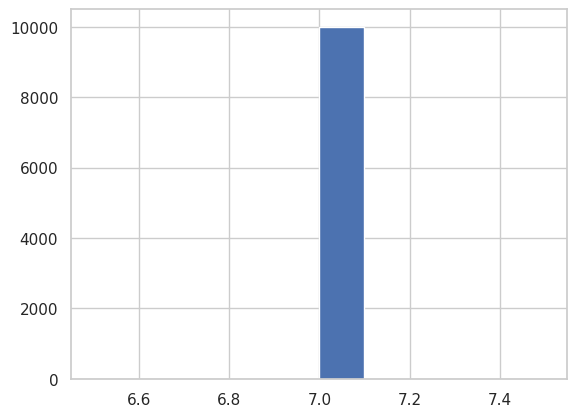

In [57]:
with open('results/device_clock_granularity', 'r') as file:
    elems = file.read().split('\n')[:-1]
    elems = [float(e) for e in elems]

counts, bins = np.histogram(elems)
plt.hist(bins[:-1], bins, weights=counts)
print(max(elems), min(elems))
print(bins)
print(counts)

32.0 0.0
[ 0.   3.2  6.4  9.6 12.8 16.  19.2 22.4 25.6 28.8 32. ]
[8880    0    0    0    0    0    0    0    0 1120]


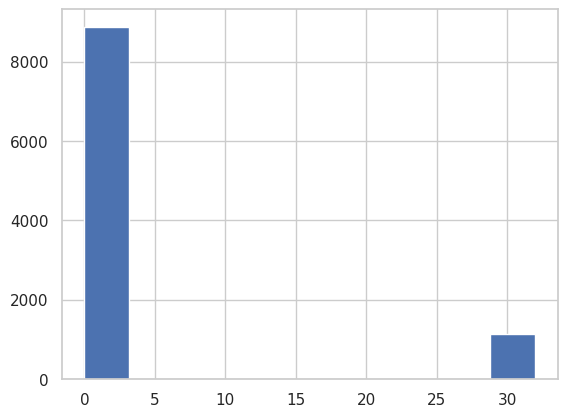

In [58]:
with open('results/device_global_clock_granularity', 'r') as file:
    elems = file.read().split('\n')[:-1]
    elems = [float(e) for e in elems]

counts, bins = np.histogram(elems)
plt.hist(bins[:-1], bins, weights=counts)
print(max(elems), min(elems))
print(bins)
print(counts)

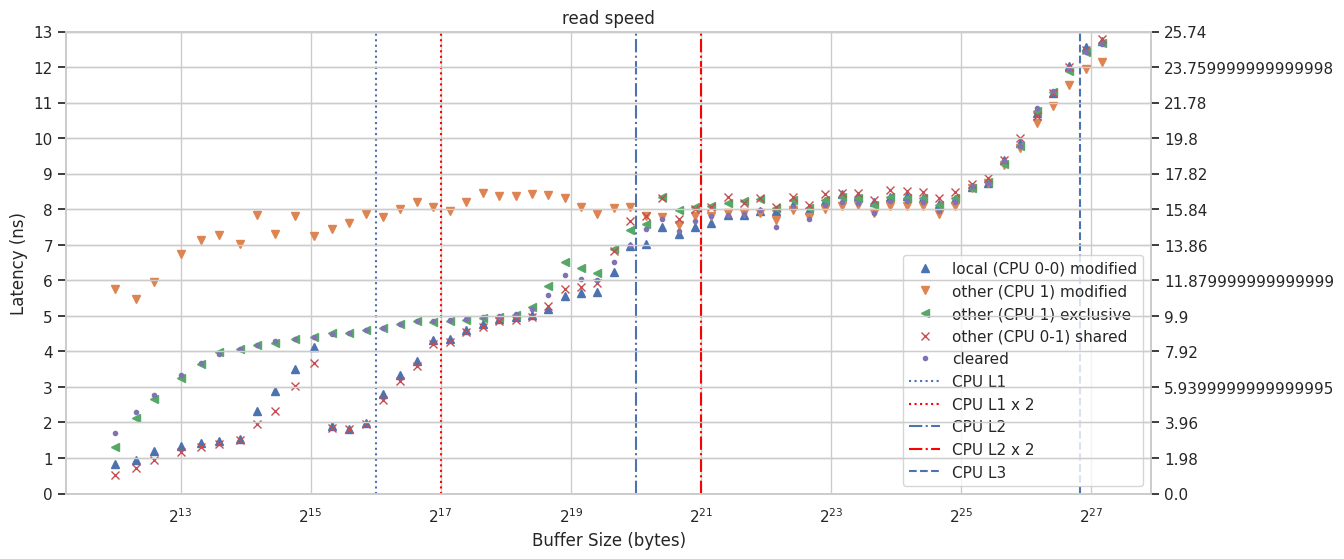

In [31]:
numerical = [int(dir) for dir in os.listdir('results/host/read/other_exclusive')]
numerical.sort()
#numerical = numerical[4:]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/host/read/local_modified/'))
results2 = list(results_generator(l, 'results/host/read/other_modified/'))
results3 = list(results_generator(l, 'results/host/read/invalid/'))
#results4 = list(results_generator(l, 'results/host/read/far_modified/'))
results5 = list(results_generator(l, 'results/host/read/other_shared/'))
#results6 = list(results_generator(l, 'results/host/read/far_shared/'))
results7 = list(results_generator(l, 'results/host/read/other_exclusive/'))

f = plt.figure(figsize=(14,6))
ax1 = f.add_subplot(111)
ax1.set_xscale('log', base=2)
#ax1.yscale('log', base=10)
ax1.set_title('read speed')
ax1.set_xlabel('Buffer Size (bytes)')
ax1.set_ylabel('Latency (ns)')
ax1.set_yticks(list(range(int(max(results2))+2)))
ax1.set_ylim(0, int(max(results2))+1)
ax2 = ax1.twinx()
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels([i * 1.98 for i in range(int(max(results2))+2)])
ax1.plot(numerical, results1, '^', label='local (CPU 0-0) modified')
ax1.plot(numerical, results2, 'v', label='other (CPU 1) modified')
#ax1.plot(numerical, results4, '<', label='other (CPU 15) modified')
ax1.plot(numerical, results7, '<', label='other (CPU 1) exclusive')
ax1.plot(numerical, results5, 'x', label='other (CPU 0-1) shared')
#ax1.plot(numerical, results6, '+', label='other (CPU 0-15) shared')
ax1.plot(numerical, results3, '.', label='cleared')
ax1.axvline(x=65536, ls=':', label = 'CPU L1')
ax1.axvline(x=65536*2, ls=':', color='red', label = 'CPU L1 x 2')
ax1.axvline(x=1048576, ls='-.', label = 'CPU L2')
ax1.axvline(x=1048576*2, ls='-.', color='red', label = 'CPU L2 x 2')
ax1.axvline(x=119537664, ls='--', label = 'CPU L3')
ax1.legend()
plt.show()

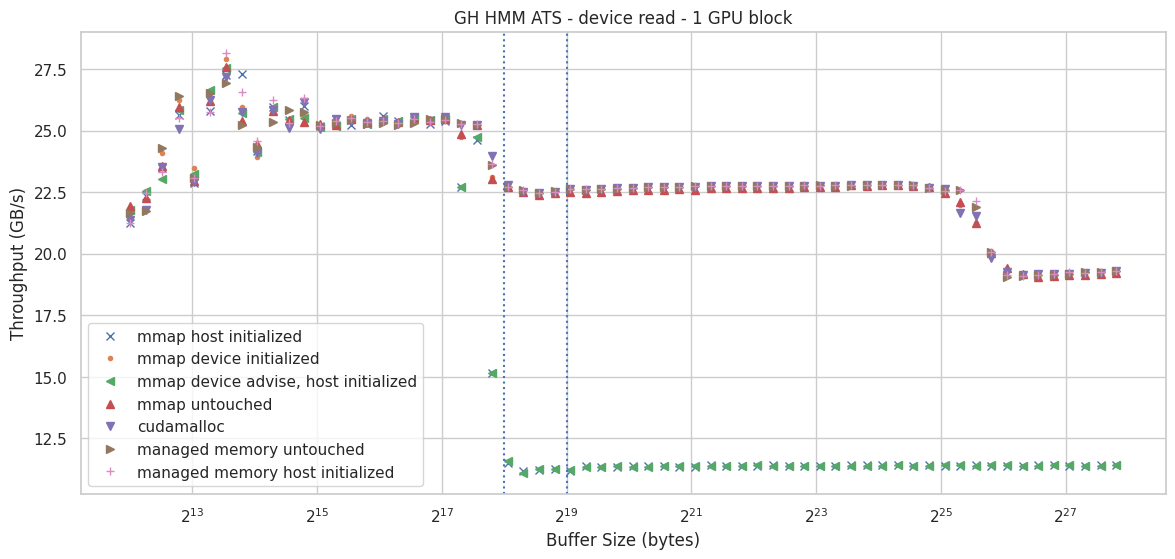

In [24]:
numerical = [int(dir) for dir in os.listdir('results/migration/cudamalloc')]
numerical.sort()
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/migration/mmap_host/', skip=1))
results2 = list(results_generator(l, 'results/migration/mmap_untouched/', skip=1))
results3 = list(results_generator(l, 'results/migration/cudamalloc/', skip=1))
results4 = list(results_generator(l, 'results/migration/mmap_host_memadvise_device/', skip=1))
results5 = list(results_generator(l, 'results/migration/managed_untouched/', skip=1))
results6 = list(results_generator(l, 'results/migration/managed_host/', skip=1))
results7 = list(results_generator(l, 'results/migration/mmap_device_write/', skip=1))

plt.figure(figsize=(14,6))
plt.xscale('log', base=2)
#plt.yscale('log', base=10)
plt.title('GH HMM ATS - device read - 1 GPU block')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Throughput (GB/s)')
plt.plot(numerical, results1, 'x', label='mmap host initialized')
plt.plot(numerical, results7, '.', label='mmap device initialized')
plt.plot(numerical, results4, '<', label='mmap device advise, host initialized')
plt.plot(numerical, results2, '^', label='mmap untouched')
plt.plot(numerical, results3, 'v', label='cudamalloc')
plt.plot(numerical, results5, '>', label='managed memory untouched')
plt.plot(numerical, results6, '+', label='managed memory host initialized')
plt.axvline(x=2**19, ls=':')
plt.axvline(x=2**18, ls=':')
plt.legend()
#plt.xlim(2**17, 2**20)
plt.show()

In [15]:
numerical = [int(dir) for dir in os.listdir('results/stream/copy/host_host')]
numerical.sort()
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/stream/copy/device_device', skip=1))
results2 = list(results_generator(l, 'results/stream/copy/device_host', skip=1))
results3 = list(results_generator(l, 'results/stream/copy/host_device', skip=1))
results4 = list(results_generator(l, 'results/stream/copy/host_host', skip=1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('stream copy, 2GB -> 2GB')
plt.xlabel('num blocks (1024 threads each)')
plt.ylabel('Throughput (GB/s)')
plt.plot(numerical, results1, '^', label='device->device')
plt.plot(numerical, results2, '.', label='device->host')
plt.plot(numerical, results3, 'x', label='host->device')
plt.plot(numerical, results4, '1', label='host->host')
plt.axvline(x=64, ls=':', label=64)
plt.axvline(x=128, ls='-.', label=128)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/stream/copy/host_host'

In [19]:
numerical = [int(dir) for dir in os.listdir('results/stream/copy/uninitialized_uninitialized')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

results1 = get_raw_results('results/stream/copy/device_device/' + last)
results2 = get_raw_results('results/stream/copy/device_host/' + last)
results3 = get_raw_results('results/stream/copy/host_device/' + last)
results4 = get_raw_results('results/stream/copy/host_host/' + last)
results5 = get_raw_results('results/stream/copy/uninitialized_uninitialized/' + last)
x_data = list(range(1, len(results1) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('stream copy, 2GB -> 2GB, full gpu')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
plt.plot(x_data, results1, '-^', label='device->device')
plt.plot(x_data, results2, '-', label='device->host')
plt.plot(x_data, results3, '-x', label='host->device')
plt.plot(x_data, results4, '-1', label='host->host')
plt.plot(x_data, results5, '-1', label='uninitialized->uninitialized')
plt.xlim(0.5, 5.5)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/stream/copy/uninitialized_uninitialized'

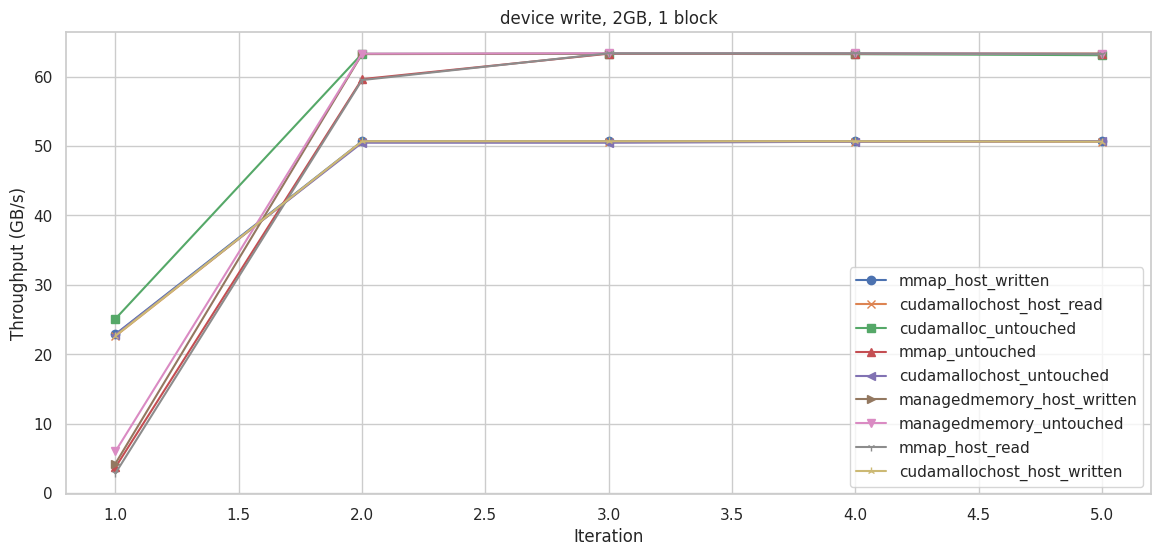

In [23]:
numerical = [int(dir) for dir in os.listdir('results/write/device/mmap_untouched')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

types = os.listdir('results/write/device')
results = [get_raw_results('results/write/device/' + t + '/' + last) for t in types]
x_data = list(range(1, len(results[0]) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('device write, 2GB, 1 block')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
for r, t, s in zip(results, types, ['o', 'x', 's', '^', '<', '>', 'v', '1', '2', '3', '4']):
    # if 'cudamallochost' in t:
        plt.plot(x_data, r, '-'+s, label=t)
plt.legend()
plt.show()

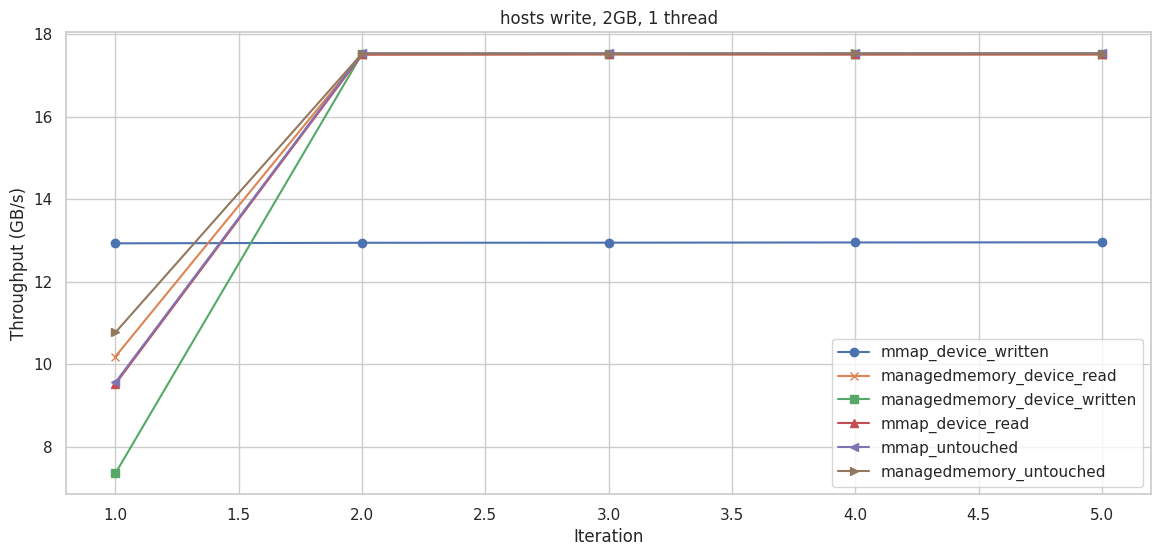

In [15]:
numerical = [int(dir) for dir in os.listdir('results/write/host/mmap_untouched')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

types = os.listdir('results/write/host')
results = [get_raw_results('results/write/host/' + t + '/' + last) for t in types]
x_data = list(range(1, len(results[0]) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('hosts write, 2GB, 1 thread')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
for r, t, s in zip(results, types, ['o', 'x', 's', '^', '<', '>', 'v', '1', '2', '3', '4']):
    # if 'cudamallochost' in t:
        plt.plot(x_data, r, '-'+s, label=t)
plt.legend()
plt.show()

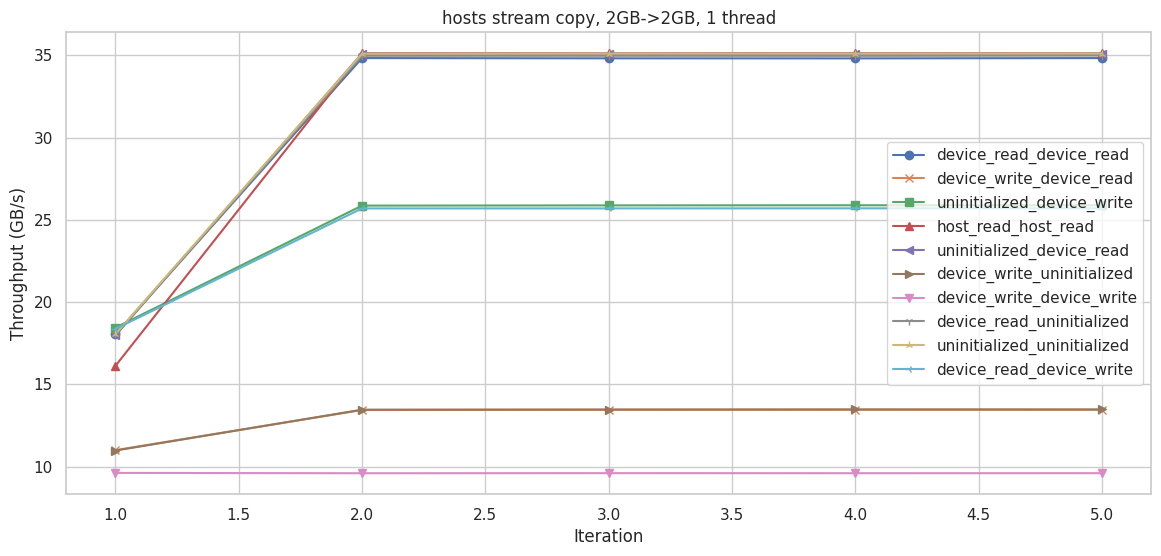

In [16]:
numerical = [int(dir) for dir in os.listdir('results/stream/copy/host/uninitialized_uninitialized')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

types = os.listdir('results/stream/copy/host')
results = [get_raw_results('results/stream/copy/host/' + t + '/' + last) for t in types]
x_data = list(range(1, len(results[0]) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('hosts stream copy, 2GB->2GB, 1 thread')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
for r, t, s in zip(results, types, ['o', 'x', 's', '^', '<', '>', 'v', '1', '2', '3', '4']):
    # if 'cudamallochost' in t:
        plt.plot(x_data, r, '-'+s, label=t)
plt.legend()
plt.show()

IN GENERAL:
- read is not enough to pin the memory somewhere, but still has some little effect
    - read -> read is worse than all uninitialized, but not by much
- write appears to be pinning the memory
    - leads to worse performance overall

PERFORMANCE
- dwrite->dwrite
    - slowest: both are on device (HBM-C2C-HBM)
- dwrite -> (dread/uninit)
    - second slowest (HBM-C2C-DDR)
- dread -> dwrite
    - (DDR(?)-C2C-HBM)
    - uninit -> dwrite slightly faster
- dread->dread < dread->uninit < hread-hread = uninit->uninit = uninit->dread
    - should all be (DDR-DDR)

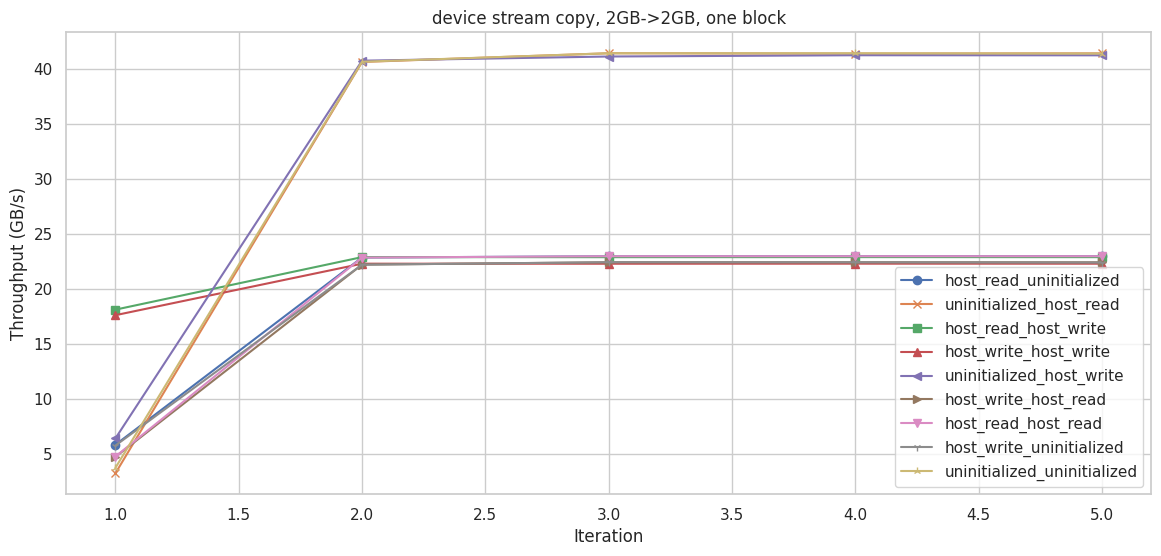

In [24]:
numerical = [int(dir) for dir in os.listdir('results/stream/copy/device/uninitialized_uninitialized')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

types = os.listdir('results/stream/copy/device')
results = [get_raw_results('results/stream/copy/device/' + t + '/' + last) for t in types]
x_data = list(range(1, len(results[0]) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('device stream copy, 2GB->2GB, one block')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
for r, t, s in zip(results, types, ['o', 'x', 's', '^', '<', '>', 'v', '1', '2', '3', '4']):
    # if 'host_write_uninitialized' in t:
        plt.plot(x_data, r, '-'+s, label=t)
plt.legend()
plt.show()

In [6]:
numerical = [int(dir) for dir in os.listdir('results/read/host/mmap_untouched')]
numerical.sort()
l = [str(dir) for dir in numerical]
last = l[-1]

types = os.listdir('results/read/host')
results = [get_raw_results('results/read/host/' + t + '/' + last) for t in types]
x_data = list(range(1, len(results[0]) + 1))
# block kernel launched normally
plt.figure(figsize=(14,6))
plt.title('host read, 2GB, 32 thread')
plt.xlabel('Iteration')
plt.ylabel('Throughput (GB/s)')
for r, t, s in zip(results, types, ['o', 'x', 's', '^', '<', '>', 'v', '1', '2', '3', '4']):
    # if 'cudamallochost' in t:
        plt.plot(x_data, r, '-'+s, label=t)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/read/host/mmio/2147483648'

1.9795042957924724


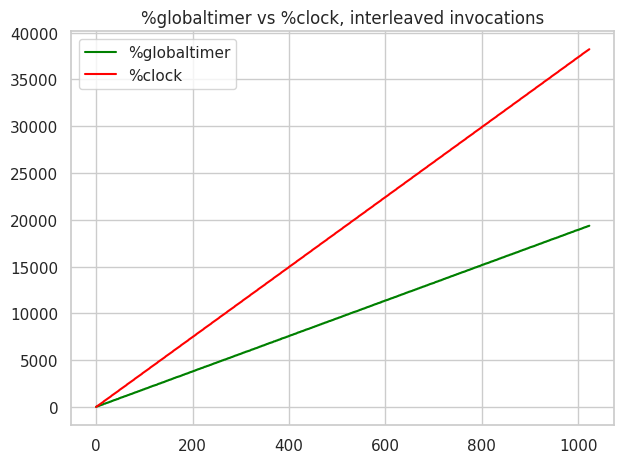

In [5]:
def normalize(l):
    return [e - l[0] for e in l]

blocks = list(range(264))
gclocks = []
lclocks = []

for b in blocks:
    with open('results/gpu_clock/global/' + str(b)) as file:
        elems = file.read().split('\n')[:-1]
        elems = [int(e) for e in elems]
        gclocks.append(elems)
    with open('results/gpu_clock/local/' + str(b)) as file:
        elems = file.read().split('\n')[:-1]
        elems = [int(e) for e in elems]
        lclocks.append(elems)

gfirsts = [l[0] for l in gclocks]
lfirsts = [l[0] for l in lclocks]
glasts = [l[-1] for l in gclocks]
llasts = [l[-1] for l in lclocks]

#plt.plot(blocks, normalize(gfirsts))
#plt.plot(blocks, normalize(llasts))

gn = normalize(gclocks[0])
ln = normalize(lclocks[0])

plt.plot(gn, color='green', label='%globaltimer')
plt.plot(ln, color='red', label='%clock')
plt.legend()
plt.title('%globaltimer vs %clock, interleaved invocations')
plt.tight_layout()

ratios = []
for i in range(len(gclocks)):
    gn = normalize(gclocks[i])
    ln = normalize(lclocks[i])
    ratios.append((ln[-1] - ln[0]) / (gn[-1] - gn[0]))

print(np.mean(np.array(ratios)))

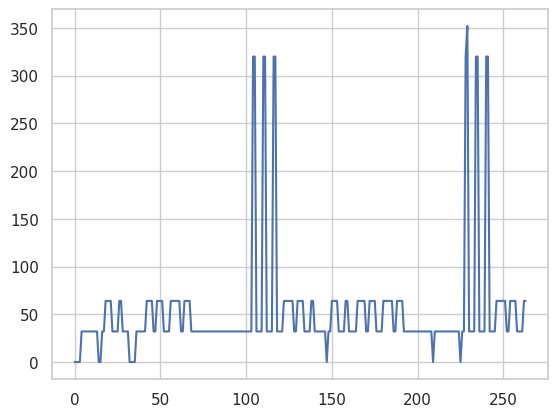

In [5]:
plt.plot(normalize(gfirsts))

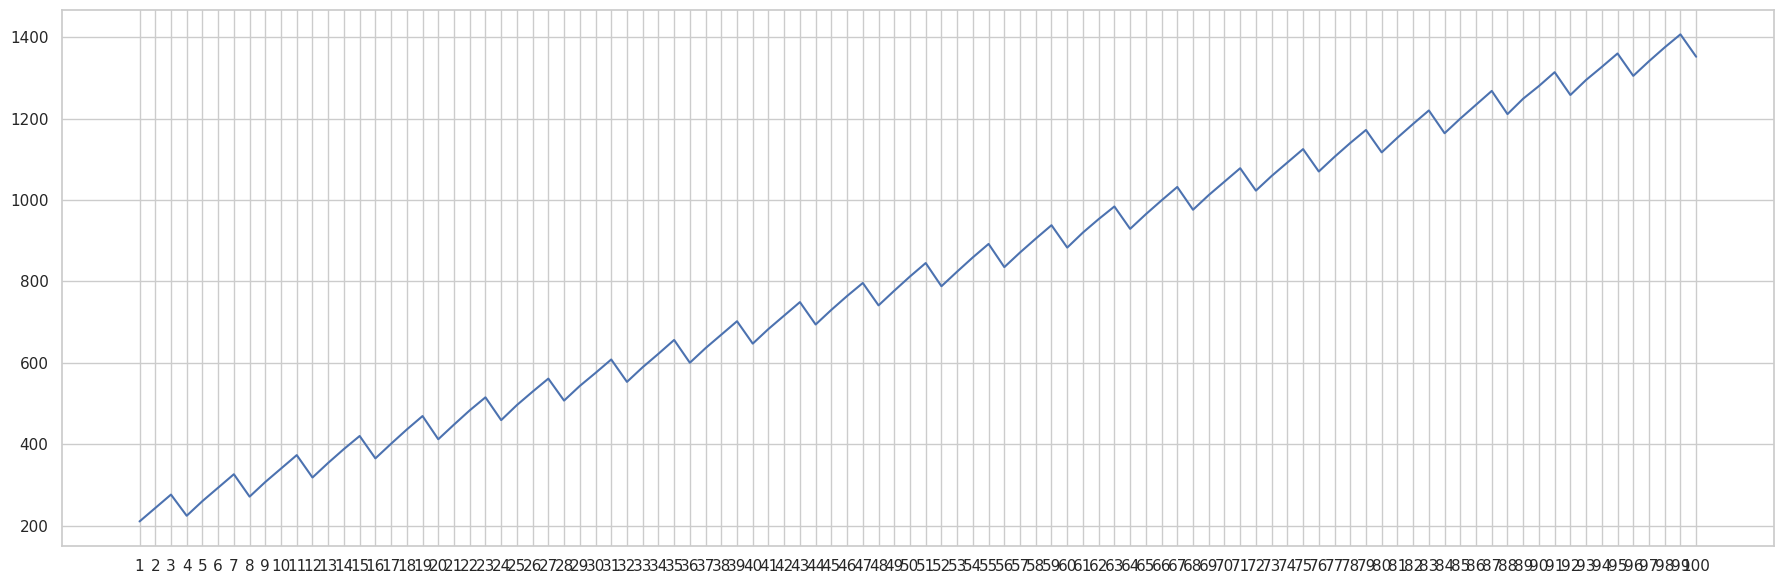

In [16]:
with open('results/kernel_loop_overhead') as file:
    elems = file.read().split('\n')[:-1]
    elems = [int(e) for e in elems]

elems = elems[:100]

plt.figure(figsize=(18, 6))
plt.plot(range(1, len(elems) + 1), elems)
plt.xticks(range(1, len(elems) + 1))
plt.tight_layout()

<Axes: >

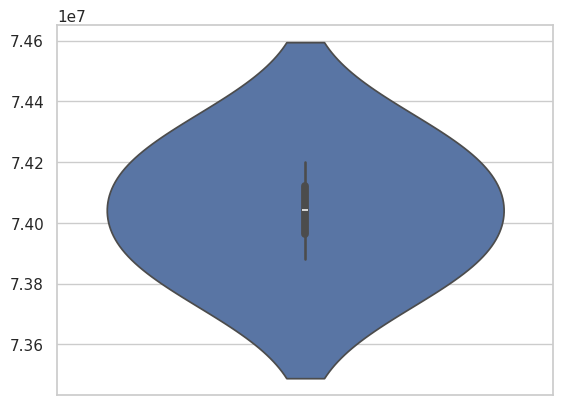

In [47]:
with open('results/clock_analysis/host/end/0') as file:
    elems = file.read().split('\n')[:-1]
    elems = [int(e) for e in elems]

#elems = normalize(elems)
d = dict()
for e in elems:
    if e in d:
        d[e] += 1
    else:
        d[e] = 1

sns.violinplot(elems)